<a href="https://colab.research.google.com/github/Hrotich/The-Titanic-clasification-Model/blob/main/The_Titanic_Classification_Model_Haron_Kipkoech_Rotich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement


###Main objective
To build a model  that help in classifying if a passanger survived the Titanic accident or did not survive

In [1]:
#Importing necessary libraraies
import pandas as pd
import  numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importing the  the data sets

test= pd.read_csv("/content/test (5).csv")
train= pd.read_csv("/content/train (3).csv")
gender= pd.read_csv("/content/gender_submission (1).csv")

######Overview of data sets

In [3]:
#test
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#train
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Gender
gender.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# to merge test and  gender submission datasets
df=pd.merge(test,gender, on='PassengerId')

In [7]:
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [8]:
# shape for  df(merged data)
df.shape

(418, 12)

In [9]:
# checking for  df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [10]:
#checking for data  type for merged data
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [11]:
# check for data description fo df
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [12]:
# checkinf for description for train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#checking for dtypes for train set
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# check for description of our train set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# checking shape  of  trainset
train.shape

(891, 12)

In [16]:
# checking for Duplicates
df.duplicated().sum()

0

In [17]:
#checking for duplicates on  df
train.duplicated().sum()

0

In [18]:
#Checking for missing values on df
df.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [19]:
train.isna().sum()# chceckig for Missing values on train set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Data Preprocessing

In [20]:
# Dropping  Embarked variable in  both df and train set
df.drop(['Cabin'], axis=1,inplace=True)

train.drop(['Cabin'], axis=1,inplace=True)

In [21]:
# Imputing the
df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Survived        0
dtype: int64

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [23]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [24]:
train.dropna(axis = 1,inplace=True)

In [25]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

<Axes: xlabel='Survived'>

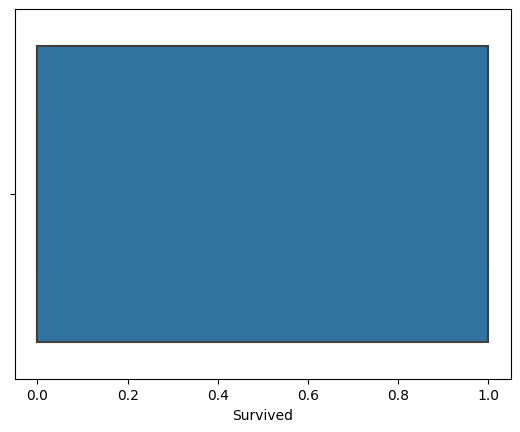

In [26]:
# Outliers
#  using  box plot to detec outliers
sns.boxplot(x =df['Survived'])
# there are a no outlier present

<Axes: xlabel='Fare'>

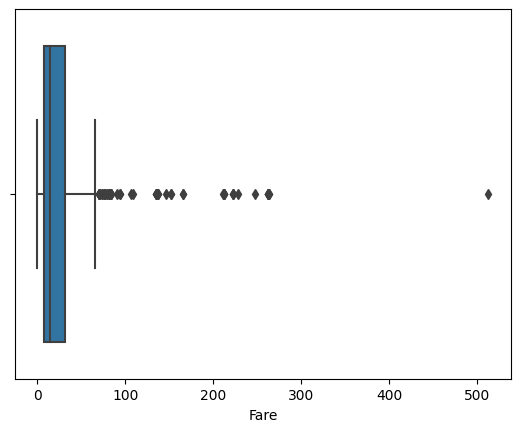

In [27]:
#  using  box plot to detec outliers
sns.boxplot(x =df['Fare'])
# there are a number of outliers on this  fare variable

<Axes: xlabel='Pclass'>

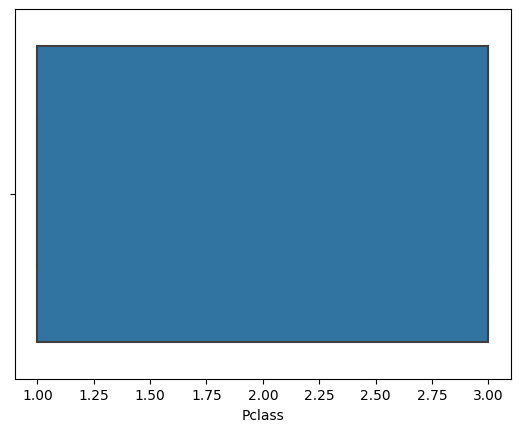

In [28]:
#  using  box plot to detec outliers
sns.boxplot(x =df['Pclass'])
#There no outliers on Pclass variable

<Axes: xlabel='PassengerId'>

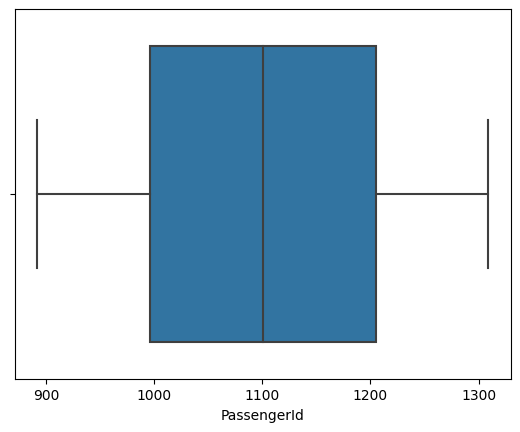

In [29]:
sns.boxplot(x =df['PassengerId'])
#Thereno aoutliers  on this  variable

<Axes: xlabel='Age'>

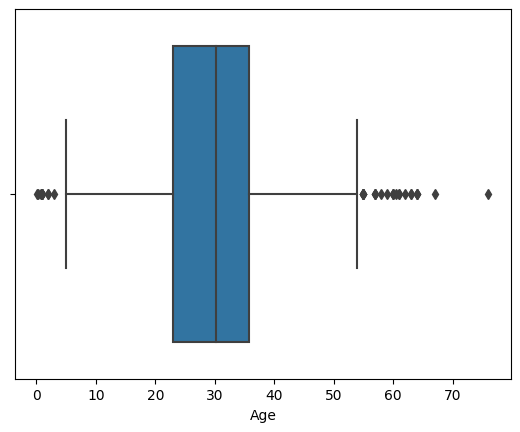

In [30]:
sns.boxplot(x =df['Age'])
#There a a few outliers on this  variable

<Axes: xlabel='SibSp'>

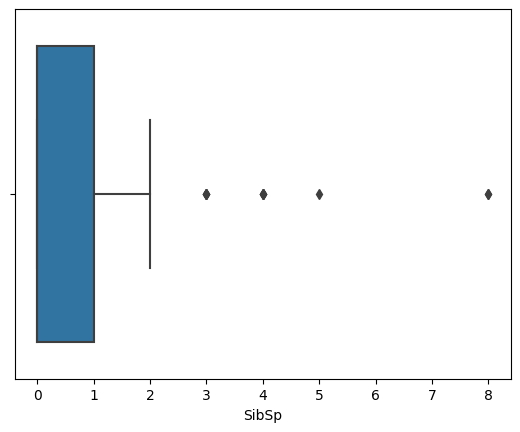

In [31]:
sns.boxplot(x =df['SibSp'])
#There are some outliers on this  varaiable

In [32]:
#Dealing with outliers
upper_limit = df['Fare'].quantile(0.99) # finding the upper quatile
lower_limit = df['Fare'].quantile(0.01) # finding the lower Quatile
print(upper_limit)
print(lower_limit)

262.375
6.447411


In [33]:
df1= df[(df['Fare'] <= 40.00) & (df['Fare'] >= 6.447411)]

<Axes: xlabel='Fare'>

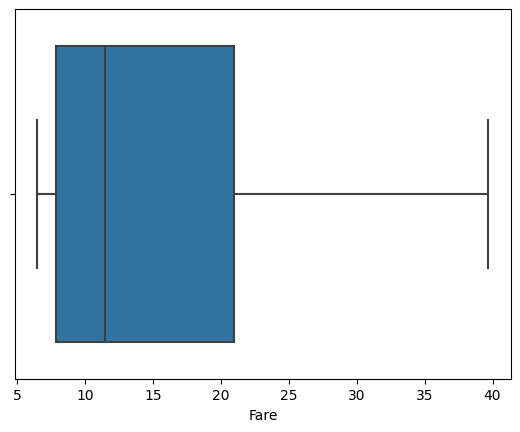

In [34]:
#  using  box plot to detec outliers
sns.boxplot(x =df1['Fare'])

In [35]:
upper_limit = df['Age'].quantile(0.99) # finding the upper quatile
lower_limit = df['Age'].quantile(0.01) # finding the lower Quatile
print(upper_limit)
print(lower_limit)

63.829999999999984
0.9336


In [36]:
df2= df1[(df['Age'] <= 40.00) & (df1['Age'] >= 10.00)]

<ipython-input-36-376a361abcb1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2= df1[(df['Age'] <= 40.00) & (df1['Age'] >= 10.00)]


<Axes: xlabel='Age'>

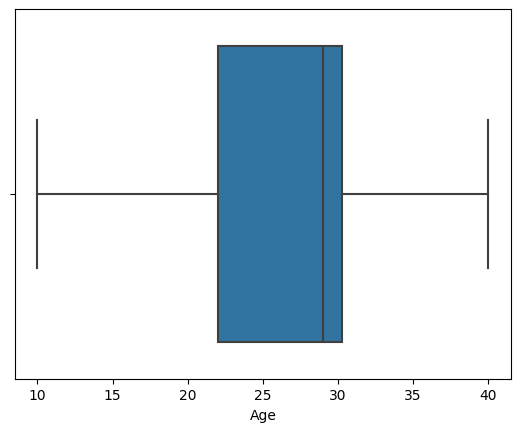

In [37]:
sns.boxplot(x =df2['Age'])

###Data preprocessingt

In [38]:
# Encoding categorical variables
# Etracting categorical variables
df2.dtypes[df2.dtypes == 'object'].index

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [39]:
# To drop name variable from dataframe
df2=df2.drop('Name', axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
en=LabelEncoder()

df2['Sex']=en.fit_transform(df2['Sex'])
df2['Ticket']=en.fit_transform(df2['Ticket'])
df2['Embarked']=en.fit_transform(df2['Embarked'])

Data  Modelling

In [42]:
df2.Survived

0      0
3      0
4      1
5      0
6      1
      ..
412    1
413    0
415    0
416    0
417    0
Name: Survived, Length: 271, dtype: int64

In [43]:
#To define feature and  Traget variable
y=df2['Survived'].values
x=df2[['Age','PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked']]

In [44]:
# Splitting data set to train and  test sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test= train_test_split(x, y, test_size=0.25, random_state=0)

In [45]:
# Scale the features using StandardScaler
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=0)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [47]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[48,  0],
       [ 0, 20]])

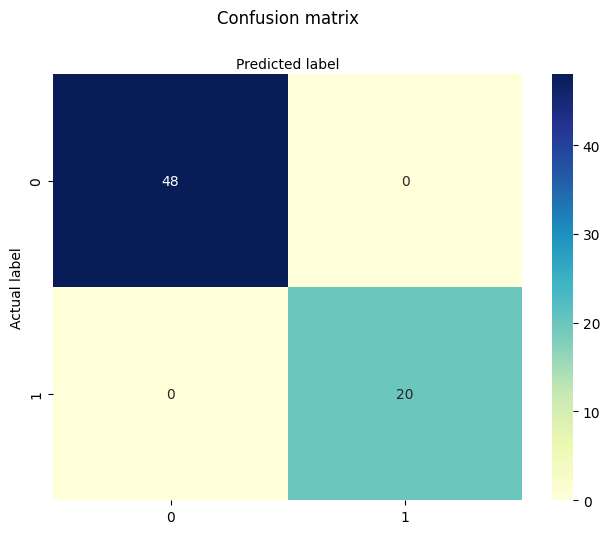

In [48]:
# confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [50]:

from sklearn.metrics import accuracy_score, confusion_matrix, explained_variance_score,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[48  0]
 [ 0 20]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        20

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



###SVM

In [53]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [54]:
# model evaluation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [55]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0


###KNN

In [56]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [58]:
#Model prediction
y_pred = knn.predict(x_test)

In [59]:
#Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705882352941176


In [60]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.90      0.95        20

    accuracy                           0.97        68
   macro avg       0.98      0.95      0.96        68
weighted avg       0.97      0.97      0.97        68

[[48  0]
 [ 2 18]]


##Naive Bayes classification

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)

GaussianNB()

In [63]:
# Model prediction
predicted = model.predict([x_test[10]])

In [64]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(x_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


NLP

In [68]:
import warnings

In [ ]:
from sklearn.neural_network import MLPClassifier
# Creating our model
mlp = MLPClassifier()

#fitting the model

mlp.fit(x_train, y_train)

In [69]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[48  0]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        20

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



####Conclusion and recomendation

* KNN is the least performing model with accuracy calssification of 97% which slightly lower than those of other models that give accuracy of 100% correct classifaction.
* Nlp is good  as its  is faster to implement  and is best for  large data sets, Logistics reggression model will also give the best result and ist more simple to implement.

In [65]:
#https://www.datacamp.com/tutorial/understanding-logistic-regression-python
#https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
#https://builtin.com/data-science/supervised-machine-learning-classification